# European Social Survey
This is a biannual survey to measure the attitudes, beliefs and behavior patterns of the various populations in Europe. Using selected questions from the 2012 and 2014 editions, address the following questions. Here is the data file, and here is the codebook with information about the variable coding and content.https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

Note: the field idno should not be taken as a unique identifier.

Did people become less trusting from 2012 to 2014?

Did people become happier from 2012 to 2014?

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [3]:
ess_combined = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")
ess_combined.info()
ess_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null int64
year       8147 non-null int64
tvtot      8147 non-null int64
ppltrst    8147 non-null int64
pplfair    8147 non-null int64
pplhlp     8147 non-null int64
happy      8147 non-null int64
sclmeet    8147 non-null int64
sclact     8147 non-null int64
gndr       8147 non-null int64
agea       8147 non-null int64
partner    8147 non-null int64
dtypes: int64(12), object(1)
memory usage: 827.5+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


##  1. Did people become less trusting from 2012 to 2014?

In [4]:
# Split into two DataFrames for ease of analysis

ess_2012 = ess_combined[ess_combined['year']==6]

ess_2014 = ess_combined[ess_combined['year']==7]

print(ess_2012.head())
print(ess_2014.head())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH     5     6      3        3       10       5      8        5       4   
1    CH    25     6      6        5        7       5      9        3       2   
2    CH    26     6      1        8        8       8      7        6       3   
3    CH    28     6      4        6        6       7     10        6       2   
4    CH    29     6      5        6        7       5      8        7       2   

   gndr  agea  partner  
0     2    60        1  
1     2    59        1  
2     1    24        2  
3     2    64        1  
4     2    55        1  
    cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  \
732    CH     5     7      2        8        9       7      9        6   
733    CH    25     7      4        4        2       5      6        5   
734    CH    26     7      3        8        8       6      8        7   
735    CH    28     7      2        7        7       5      9        6   

(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)
DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


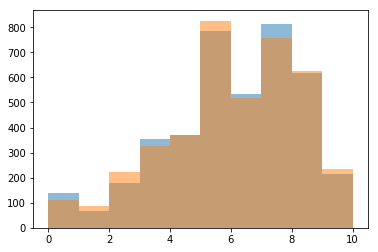

In [7]:
plt.hist(ess_2012['ppltrst'], alpha = .5)
plt.hist(ess_2014['ppltrst'], alpha = .5)

# Remember that Shapiro test is sensitive to large samples. 

print(stats.shapiro(ess_2012['ppltrst']))
print(stats.shapiro(ess_2014['ppltrst']))

print(stats.describe(ess_2012['ppltrst']))
print(stats.describe(ess_2014['ppltrst']))


# This is normally distributed.

In [10]:
stats.ttest_ind(ess_2012['ppltrst'], ess_2014['ppltrst'])
# Fail to reject the null -- there is no significant difference in trust between 2012 to 2014.

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

In [37]:
# stats.ttest_rel(ess_2012['ppltrst'], ess_2014['ppltrst'])
# unequal length arrays: since ttest_rel is for PAIRED two dependents

#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True)[source]
#Calculates the T-test for the means of TWO INDEPENDENT samples of scores.

#scipy.stats.ttest_rel(a, b, axis=0)[source]
#Calculates the T-test on TWO RELATED samples of scores, a and b.

#? how to decide whether the samples are independent?
# dont confuse with correlation.

ValueError: unequal length arrays

##  2. Did people become happier from 2012 to 2014?

(0.8943395018577576, 0.0)
(0.9060227870941162, 1.2611686178923354e-44)
DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


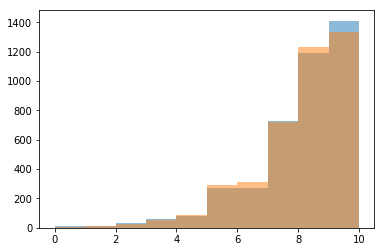

In [13]:
# Variable happy

plt.hist(ess_2012['happy'], alpha = .5)
plt.hist(ess_2014['happy'], alpha = .5)

print(stats.shapiro(ess_2012['happy']))
print(stats.shapiro(ess_2014['happy']))

print(stats.describe(ess_2012['happy']))
print(stats.describe(ess_2014['happy']))

# Not normally distributed

In [14]:
# Because not normally distributed
# We will use Kruskal-Wallis

stats.kruskal(
    ess_2012['happy'],
    ess_2014['happy'])

# p-value is right at the cut-off. Based on visual inspection I will fail 
# to reject the null and conclude that all data samples
# are drawn from the same distribution.

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

### ? what is the diff between kruskal and wilcoxon?
the answer stopped at kruskal, but it didnt answer the question does ppl get happier?

In [16]:
stats.wilcoxon((ess_2012['happy']-ess_2014['happy']))
#The median difference between pairs of observations is significantly different from zero

C:\Users\ojiang1\Documents\ANACONDA\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\ojiang1\Documents\ANACONDA\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=0.0, pvalue=0.0)

## 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


In [17]:
# How many unique countries are there?

ess_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1EA2E29E8>,
      dtype=object)

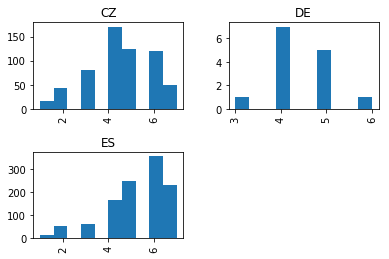

In [20]:
# I am going to pick CZ, DE and ES

filter_list = ['CZ', 'DE', 'ES']

ess_2014_cz_de_es = ess_2014[ess_2014['cntry'].isin(filter_list)]

ess_2014_cz_de_es['cntry'].unique()

ess_2014_cz_de_es['sclmeet'].hist(by = ess_2014_cz_de_es['cntry'])

In [21]:
# these are sparser samples of ordinal data
# so nothing will be perfectly "normal," 
# we will have to "eyeball" it.
# we will do a Kruskal Wallis test

stats.kruskal(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclmeet']])

KruskalResult(statistic=120.72958033262947, pvalue=6.0800161031835895e-27)

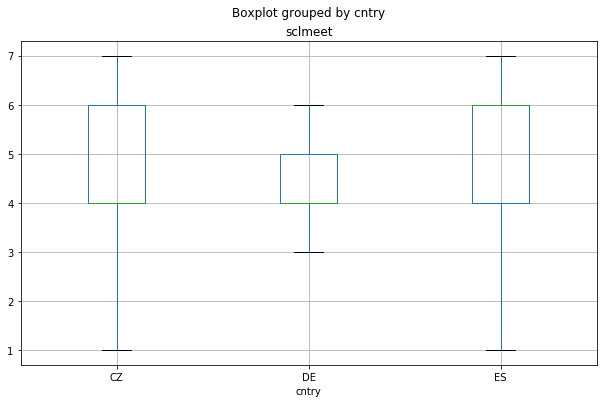

In [22]:
# It appears that not all medians are equal, so
# Which one is the odd country out?
# I'm thinking DE

ess_2014_cz_de_es.boxplot('sclmeet', by='cntry', figsize=(10, 6))

##  4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

#  why the answer only plot the hist and conclude it is normal? i dont think it is normal based on shapiro and stats.describe. will go for non normal

(0.8507498502731323, 1.7831243085382034e-23)
(0.7937105894088745, 0.004176934715360403)
(0.8937478065490723, 2.9219467633214553e-27)
DescribeResult(nobs=606, minmax=(1, 5), mean=2.7293729372937294, variance=0.7134167962250769, skewness=-0.27883074625381743, kurtosis=0.21759096064150674)
DescribeResult(nobs=14, minmax=(1, 4), mean=2.7142857142857144, variance=0.5274725274725275, skewness=-0.7909810627737351, kurtosis=0.6354166666666665)
DescribeResult(nobs=1134, minmax=(1, 5), mean=2.631393298059965, variance=0.9037267419144442, skewness=0.05248738196690647, kurtosis=-0.25954410283656104)


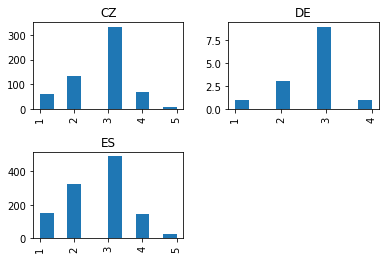

In [33]:
# I will stick with the same countries as above
ess_2014_cz_de_es['sclact'].hist(by = ess_2014_cz_de_es['cntry'])

# These look a little more normal to me. 
# At least they are symmetrical.
# So let's do a one-way ANOVA.


### i dont think it is normal distro?

cz=ess_2014_cz_de_es[ess_2014_cz_de_es['cntry'] == 'CZ']
de=ess_2014_cz_de_es[ess_2014_cz_de_es['cntry'] == 'DE']
es=ess_2014_cz_de_es[ess_2014_cz_de_es['cntry'] == 'ES']

cz.head()
print(stats.shapiro(cz['sclact']))
print(stats.shapiro(de['sclact']))
print(stats.shapiro(es['sclact']))
## p-value: one under <.05 indicates non-normality --> none of them look normal to me?

print(stats.describe(cz['sclact']))
print(stats.describe(de['sclact']))
print(stats.describe(es['sclact']))

In [27]:
stats.f_oneway(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclact']])

# No significant difference in groups.

F_onewayResult(statistic=array([2.28963493]), pvalue=array([0.10160666]))

In [28]:
# Let's check pairwise statistics with Tukey's HSD.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = ess_2014_cz_de_es['sclact'],      # Data
                          groups = ess_2014_cz_de_es['cntry'],   # Groups
                          alpha=0.05) 


tukey.summary()

group1,group2,meandiff,lower,upper,reject
CZ,DE,-0.0151,-0.5946,0.5644,False
CZ,ES,-0.098,-0.2058,0.0099,False
DE,ES,-0.0829,-0.6594,0.4936,False


In [34]:
#? since i dont think it is normal so : based on p we reject null, ie, they have diff distro 

stats.kruskal(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclact']])



KruskalResult(statistic=6.6483852801485455, pvalue=0.036001573250638776)

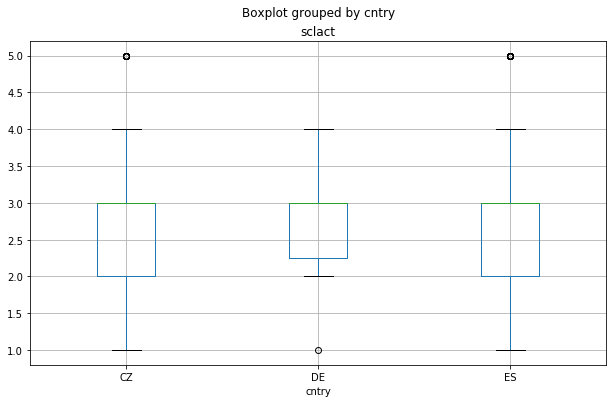

In [35]:
# ? who stand out? DE?
ess_2014_cz_de_es.boxplot('sclact', by='cntry', figsize=(10, 6))

# Ruff Figural Fluency 
Test This test provides information about nonverbal capacity for initiation, planning, and divergent reasoning. You can find the data here. The Casenr is a unique identifier.

In [36]:
# https://www.parinc.com/Products/Pkey/360
# https://datadryad.org/resource/doi:10.5061/dryad.rr138

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rfft = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
rfft.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


##  1.Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [38]:
# To ease in our analysis let's pivot the data.

rfft_unique = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')
rfft_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


(0.9935339093208313, 4.241936579774119e-09)
DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


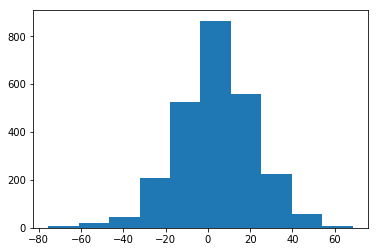

In [40]:
# is the diff normal distro?

plt.hist(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)'])

diff=rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)']

print(stats.shapiro(diff))

print(stats.describe(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)']))

In [44]:
stats.ttest_rel(rfft_unique['Measurement 3 (2008-2012)'], rfft_unique['Measurement 2 (2006-2008)'])

# Yes, there appears to be a significant difference between unique designs by the same participants between Measurements 2 and 3.

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

In [43]:
# ? how to decide ttest ind vs tel? independent vs depedent?
# dont confuse it with correlation
stats.ttest_ind(rfft_unique['Measurement 3 (2008-2012)'], rfft_unique['Measurement 2 (2006-2008)'])

Ttest_indResult(statistic=5.172289431795646, pvalue=2.4021740879907784e-07)

##  2. Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

In [45]:
# Again, let's pivot the data

rfft_persev = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_persev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

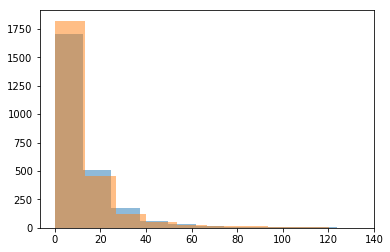

In [46]:
plt.hist(rfft_persev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_persev['Measurement 2 (2006-2008)'], alpha = .5)

In [47]:
# Reject the null, there is a significant difference between perseverative errors
# from the same participants at Measurements 2 and 3

stats.wilcoxon(rfft_persev['Measurement 3 (2008-2012)'], rfft_persev['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

In [48]:
#? kruskal? 
stats.kruskal(rfft_persev['Measurement 3 (2008-2012)'], rfft_persev['Measurement 2 (2006-2008)'])

KruskalResult(statistic=4.888785605096552, pvalue=0.027031693666595576)